In [1]:
#Mounting our Drive to Google Colab
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
#First path in below cell - Your Google Drive file location which you want to unzip
#Secnod path in below cell - Path where you want to extract the zip file in Google Drive
!unzip "/drive/My Drive/Colab Notebooks/nature.zip" -d "/drive/My Drive/Colab Notebooks/nature"

Archive:  /drive/My Drive/Colab Notebooks/nature.zip
   creating: /drive/My Drive/Colab Notebooks/nature/nature/
   creating: /drive/My Drive/Colab Notebooks/nature/nature/seg_test/
   creating: /drive/My Drive/Colab Notebooks/nature/nature/seg_test/seg_test/
   creating: /drive/My Drive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/
  inflating: /drive/My Drive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/20057.jpg  
  inflating: /drive/My Drive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/20060.jpg  
  inflating: /drive/My Drive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/20061.jpg  
  inflating: /drive/My Drive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/20064.jpg  
  inflating: /drive/My Drive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/20073.jpg  
  inflating: /drive/My Drive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/20074.jpg  
  inflating: /drive/My Drive/Colab Notebooks/nature/nature

In [3]:
import os
from PIL import Image
import numpy as np

# define the path to data directory
data_dir = '/drive/MyDrive/Colab Notebooks/nature/nature/seg_train/seg_train'

# define the list of class names
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# initialize empty lists for X and Y
X_train = []
y_train = []

# loop over the class names and extract the data
for i, class_name in enumerate(class_names):
    # define the path to the current class directory
    class_dir = os.path.join(data_dir, class_name)
    
    # loop over the images in the current class directory
    for image_name in os.listdir(class_dir):
        # load the image using PIL
        image = Image.open(os.path.join(class_dir, image_name))
        
        # resize the image
        image = image.resize((150, 150))
        
        # convert the image to a numpy array and normalize the pixel values to [0, 1]
        image = np.array(image)
        
        # add the image to X
        X_train.append(image)
        
        # add the label to Y
        y_train.append(i)
        
# convert X and Y to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# print the shapes of X and Y (training)
print('X train shape:', X_train.shape)
print('y train shape:', y_train.shape)

X train shape: (2700, 150, 150, 3)
y train shape: (2700,)


In [4]:
# define the path to data directory
data_dir = '/drive/MyDrive/Colab Notebooks/nature/nature/seg_test/seg_test'

# define the list class names
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# initialize empty lists for X and Y
X_test = []
y_test = []

# loop over the class names and extract the data
for i, class_name in enumerate(class_names):
    # define the path to the current class directory
    class_dir = os.path.join(data_dir, class_name)
    
    # loop over the images in the current class directory
    for image_name in os.listdir(class_dir):
        # load the image using PIL
        image = Image.open(os.path.join(class_dir, image_name))
        
        # resize the image
        image = image.resize((150, 150))
        
        # convert the image to a numpy array and normalize the pixel values to [0, 1]
        image = np.array(image)
        
        # add the image to X
        X_test.append(image)
        
        # add the label to Y
        y_test.append(i)
        
# convert X and Y to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# print the shapes of X and Y (training)
print('X test shape:', X_test.shape)
print('y test shape:', y_test.shape)

X test shape: (536, 150, 150, 3)
y test shape: (536,)


In [5]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (2700, 150, 150, 3)
y_train shape (2700,)
X_test shape (536, 150, 150, 3)
y_test shape (536,)


In [6]:
# Keras imports for the dataset and build neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical #for One Hot, alternative to GetDummy

#Flattening the image frmo 150x150 pixels to 1D 22500 pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
#Normalising the data to help with the training
X_train /= 255
X_test /= 255

In [8]:
#One-hot encoding
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print("Shape before one-hot encoding:", y_train.shape)
print("Shape after one-hot encoding:", Y_train.shape)

Shape before one-hot encoding: (2700,)
Shape after one-hot encoding: (2700, 6)


In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical

In [9]:
#Building model
L1 = 16
L2 = 32
L3 = 64
model = Sequential()
model.add(Conv2D(L1, (3,3), activation='relu', input_shape=(150,150,3),padding = 'same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(L1, (3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(L3, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(6,activation='softmax')) 

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, Y_train, epochs = 100, batch_size=100,
                    validation_data = (X_test, Y_test))

Epoch 1/100
27/27 [==============================] - 11s 60ms/step - loss: 1.3832 - accuracy: 0.4637 - val_loss: 1.1912 - val_accuracy: 0.5541
Epoch 2/100
27/27 [==============================] - 1s 38ms/step - loss: 1.0133 - accuracy: 0.6322 - val_loss: 1.0311 - val_accuracy: 0.6418
Epoch 3/100
27/27 [==============================] - 1s 36ms/step - loss: 0.8652 - accuracy: 0.6859 - val_loss: 1.0508 - val_accuracy: 0.6138
Epoch 4/100
27/27 [==============================] - 1s 39ms/step - loss: 0.7686 - accuracy: 0.7163 - val_loss: 0.9083 - val_accuracy: 0.6903
Epoch 5/100
27/27 [==============================] - 1s 48ms/step - loss: 0.6406 - accuracy: 0.7737 - val_loss: 0.8544 - val_accuracy: 0.6959
Epoch 6/100
27/27 [==============================] - 2s 59ms/step - loss: 0.5705 - accuracy: 0.8019 - val_loss: 1.0221 - val_accuracy: 0.6791
Epoch 7/100
27/27 [==============================] - 1s 50ms/step - loss: 0.4721 - accuracy: 0.8400 - val_loss: 0.8744 - val_accuracy: 0.7034
Epoch

<Figure size 640x480 with 0 Axes>

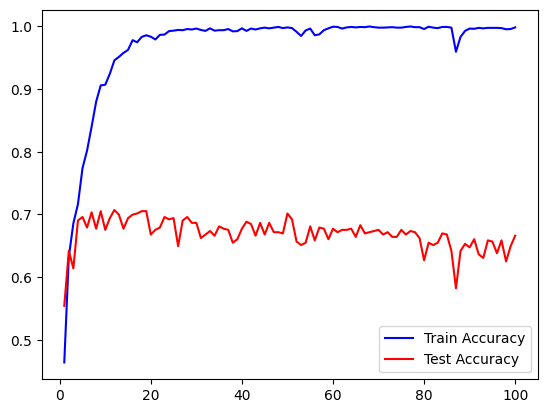

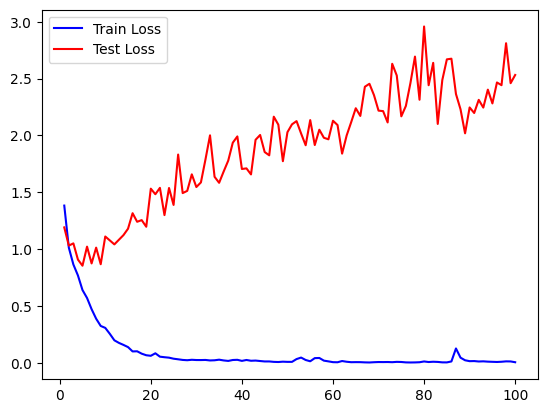

<Figure size 640x480 with 0 Axes>

In [12]:
#Visualisation
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs , acc,'b', label = 'Train Accuracy')
plt.plot (epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs , loss,'b', label = 'Train Loss')
plt.plot (epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

In [10]:
from keras import initializers
from keras import regularizers
L1 = 32
L2 = 32
L3 = 128
model2 = Sequential()
model2.add(Conv2D(L1, (5,5), activation='relu', input_shape=(150,150,3),padding = 'same',
                  kernel_initializer = 'he_normal', # He normal uses normal distribution
                  kernel_regularizer = regularizers.l1(0.01)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable))
model2.add(MaxPooling2D(pool_size=(3,3), strides=2))
model2.add(Dropout(rate=0.4))
model2.add(Conv2D(L1, (5,5), activation='relu', padding = 'same'))
model2.add(MaxPooling2D(pool_size=(3,3), strides=2))
model2.add(Dropout(rate=0.4))
model2.add(Flatten())
model2.add(Dense(L3, activation='relu'))
model2.add(Dropout(rate=0.4))
model2.add(Dense(6,activation='softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])

history2 = model2.fit(X_train, Y_train, epochs = 100, batch_size=100,
                    validation_data = (X_test, Y_test))

Epoch 1/100
27/27 [==============================] - 15s 115ms/step - loss: 8.4604 - accuracy: 0.1930 - val_loss: 4.9596 - val_accuracy: 0.1679
Epoch 2/100
27/27 [==============================] - 2s 80ms/step - loss: 4.8874 - accuracy: 0.1867 - val_loss: 4.8138 - val_accuracy: 0.1679
Epoch 3/100
27/27 [==============================] - 2s 75ms/step - loss: 4.7317 - accuracy: 0.1904 - val_loss: 4.6594 - val_accuracy: 0.1679
Epoch 4/100
27/27 [==============================] - 2s 75ms/step - loss: 4.5732 - accuracy: 0.1930 - val_loss: 4.5055 - val_accuracy: 0.1679
Epoch 5/100
27/27 [==============================] - 2s 74ms/step - loss: 4.4164 - accuracy: 0.1881 - val_loss: 4.3547 - val_accuracy: 0.1660
Epoch 6/100
27/27 [==============================] - 2s 75ms/step - loss: 4.2636 - accuracy: 0.1696 - val_loss: 4.2086 - val_accuracy: 0.1660
Epoch 7/100
27/27 [==============================] - 2s 82ms/step - loss: 4.1149 - accuracy: 0.1919 - val_loss: 4.0693 - val_accuracy: 0.1660
Epoc

<Figure size 640x480 with 0 Axes>

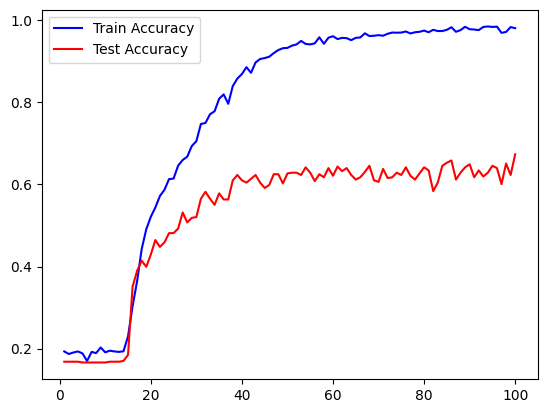

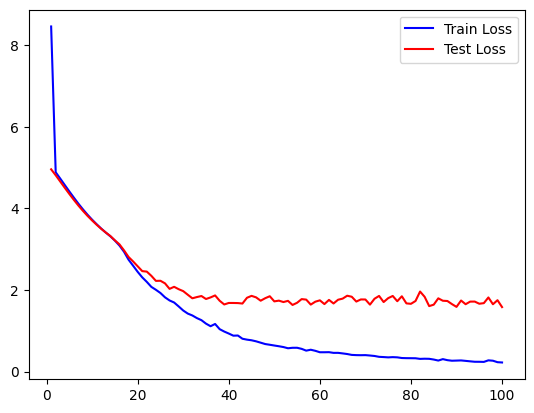

<Figure size 640x480 with 0 Axes>

In [11]:
#Visualisation
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs , acc,'b', label = 'Train Accuracy')
plt.plot (epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs , loss,'b', label = 'Train Loss')
plt.plot (epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

In [13]:
L1 = 32
L2 = 64
L3 = 128
model3 = Sequential()
model3.add(Conv2D(L1, (5,5), activation='relu', input_shape=(150,150,3),padding = 'same',
                  kernel_initializer = 'he_normal', # He normal uses normal distribution
                  kernel_regularizer = regularizers.l1(0.01)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable))
model3.add(MaxPooling2D(pool_size=(3,3), strides=2))
model3.add(Dropout(rate=0.5))
model3.add(Conv2D(L1, (5,5), activation='relu', padding = 'same'))
model3.add(MaxPooling2D(pool_size=(3,3), strides=2))
model3.add(Dropout(rate=0.5))
model3.add(Flatten())
model3.add(Dense(L3, activation='relu'))
model3.add(Dropout(rate=0.5))
model3.add(Dense(6,activation='softmax'))

model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])

history3 = model3.fit(X_train, Y_train, epochs = 100, batch_size=128,
                    validation_data = (X_test, Y_test))

Epoch 1/100
22/22 [==============================] - 4s 113ms/step - loss: 8.0350 - accuracy: 0.1937 - val_loss: 4.8163 - val_accuracy: 0.1735
Epoch 2/100
22/22 [==============================] - 2s 91ms/step - loss: 4.7462 - accuracy: 0.1907 - val_loss: 4.6795 - val_accuracy: 0.1754
Epoch 3/100
22/22 [==============================] - 2s 102ms/step - loss: 4.4709 - accuracy: 0.2815 - val_loss: 4.3375 - val_accuracy: 0.3918
Epoch 4/100
22/22 [==============================] - 2s 100ms/step - loss: 4.2452 - accuracy: 0.4074 - val_loss: 4.2547 - val_accuracy: 0.3918
Epoch 5/100
22/22 [==============================] - 2s 92ms/step - loss: 4.0345 - accuracy: 0.4300 - val_loss: 4.0108 - val_accuracy: 0.4422
Epoch 6/100
22/22 [==============================] - 2s 91ms/step - loss: 3.8331 - accuracy: 0.4889 - val_loss: 3.8643 - val_accuracy: 0.4496
Epoch 7/100
22/22 [==============================] - 2s 92ms/step - loss: 3.6296 - accuracy: 0.5022 - val_loss: 3.8066 - val_accuracy: 0.3787
Epo

<Figure size 640x480 with 0 Axes>

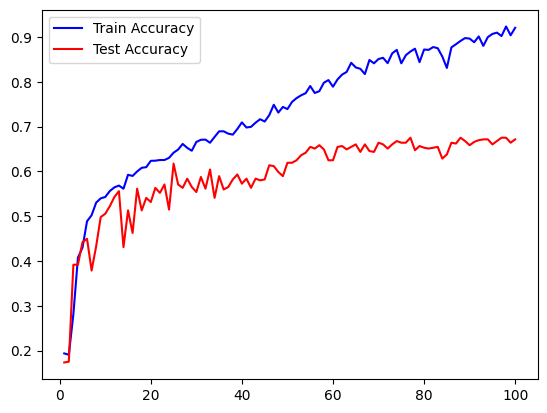

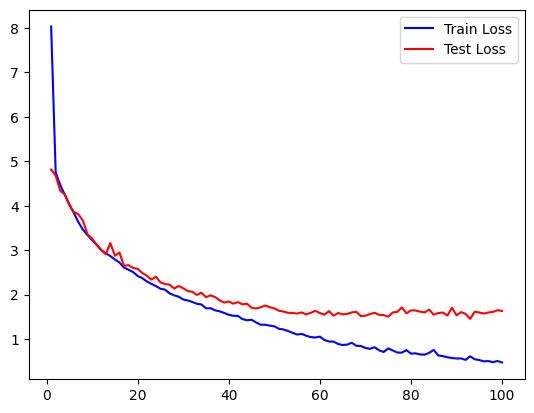

<Figure size 640x480 with 0 Axes>

In [14]:
#Visualisation
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs , acc,'b', label = 'Train Accuracy')
plt.plot (epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs , loss,'b', label = 'Train Loss')
plt.plot (epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

In [16]:
L1 = 32
L2 = 64
L3 = 128
model4 = Sequential()
model4.add(Conv2D(L1, (5,5), activation='relu', input_shape=(150,150,3),padding = 'same',
                  kernel_initializer = 'he_normal', # He normal uses normal distribution
                  kernel_regularizer = regularizers.l1(0.1)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable))
model4.add(MaxPooling2D(pool_size=(3,3), strides=2))
model4.add(Dropout(rate=0.5))
model4.add(Conv2D(L1, (5,5), activation='relu', padding = 'same'))
model4.add(MaxPooling2D(pool_size=(3,3), strides=2))
model4.add(Dropout(rate=0.5))
model4.add(Flatten())
model4.add(Dense(L3, activation='relu'))
model4.add(Dropout(rate=0.5))
model4.add(Dense(6,activation='softmax'))

model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])

history4 = model4.fit(X_train, Y_train, epochs = 100, batch_size=128,
                    validation_data = (X_test, Y_test))

Epoch 1/100
22/22 [==============================] - 4s 113ms/step - loss: 35.9579 - accuracy: 0.2011 - val_loss: 30.8559 - val_accuracy: 0.1679
Epoch 2/100
22/22 [==============================] - 2s 91ms/step - loss: 29.3743 - accuracy: 0.1893 - val_loss: 27.6158 - val_accuracy: 0.1679
Epoch 3/100
22/22 [==============================] - 2s 90ms/step - loss: 26.1474 - accuracy: 0.1867 - val_loss: 24.4416 - val_accuracy: 0.1679
Epoch 4/100
22/22 [==============================] - 2s 90ms/step - loss: 23.0535 - accuracy: 0.1944 - val_loss: 21.4703 - val_accuracy: 0.1791
Epoch 5/100
22/22 [==============================] - 2s 96ms/step - loss: 20.1847 - accuracy: 0.1852 - val_loss: 18.7411 - val_accuracy: 0.1791
Epoch 6/100
22/22 [==============================] - 2s 98ms/step - loss: 17.5618 - accuracy: 0.1870 - val_loss: 16.2689 - val_accuracy: 0.1791
Epoch 7/100
22/22 [==============================] - 2s 92ms/step - loss: 15.2197 - accuracy: 0.1856 - val_loss: 14.0782 - val_accuracy

<Figure size 640x480 with 0 Axes>

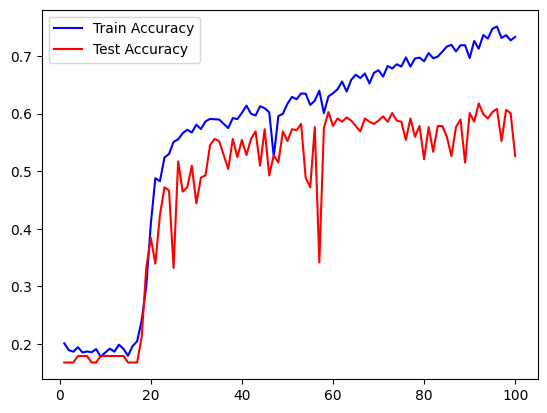

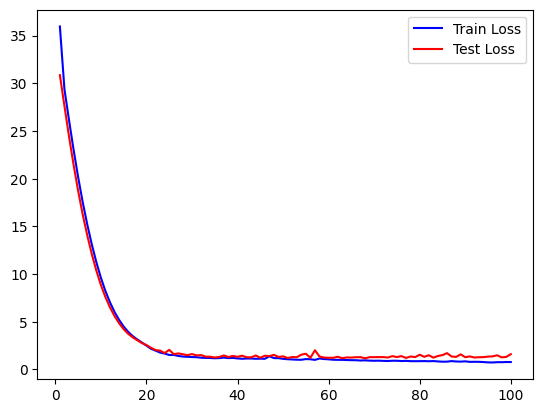

<Figure size 640x480 with 0 Axes>

In [17]:
#Visualisation
import matplotlib.pyplot as plt
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs , acc,'b', label = 'Train Accuracy')
plt.plot (epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs , loss,'b', label = 'Train Loss')
plt.plot (epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

In [18]:
L1 = 32
L2 = 128
L3 = 128
model5 = Sequential()
model5.add(Conv2D(L1, (5,5), activation='relu', input_shape=(150,150,3),padding = 'same',
                  kernel_initializer = 'he_normal', # He normal uses normal distribution
                  kernel_regularizer = regularizers.l1(0.1)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable))
model5.add(MaxPooling2D(pool_size=(3,3), strides=2))
model5.add(Dropout(rate=0.5))
model5.add(Conv2D(L1, (5,5), activation='relu', padding = 'same'))
model5.add(MaxPooling2D(pool_size=(3,3), strides=2))
model5.add(Dropout(rate=0.5))
model5.add(Flatten())
model5.add(Dense(L3, activation='relu'))
model5.add(Dropout(rate=0.5))
model5.add(Dense(6,activation='softmax'))

model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics=['accuracy'])

history5 = model5.fit(X_train, Y_train, epochs = 100, batch_size=128,
                    validation_data = (X_test, Y_test))

Epoch 1/100
22/22 [==============================] - 4s 133ms/step - loss: 37.8689 - accuracy: 0.2085 - val_loss: 31.0415 - val_accuracy: 0.1735
Epoch 2/100
22/22 [==============================] - 2s 97ms/step - loss: 29.6537 - accuracy: 0.1893 - val_loss: 27.9983 - val_accuracy: 0.1735
Epoch 3/100
22/22 [==============================] - 2s 91ms/step - loss: 26.6165 - accuracy: 0.1800 - val_loss: 25.0000 - val_accuracy: 0.1791
Epoch 4/100
22/22 [==============================] - 2s 99ms/step - loss: 23.6798 - accuracy: 0.1789 - val_loss: 22.1603 - val_accuracy: 0.1791
Epoch 5/100
22/22 [==============================] - 2s 90ms/step - loss: 20.9125 - accuracy: 0.1830 - val_loss: 19.5026 - val_accuracy: 0.1791
Epoch 6/100
22/22 [==============================] - 2s 91ms/step - loss: 18.3624 - accuracy: 0.1870 - val_loss: 17.0777 - val_accuracy: 0.1735
Epoch 7/100
22/22 [==============================] - 2s 107ms/step - loss: 16.0363 - accuracy: 0.1937 - val_loss: 14.8948 - val_accurac

<Figure size 640x480 with 0 Axes>

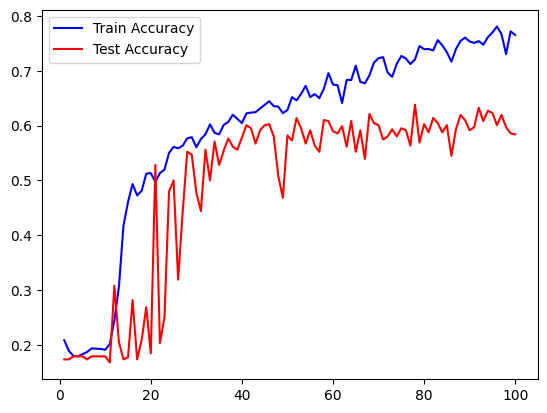

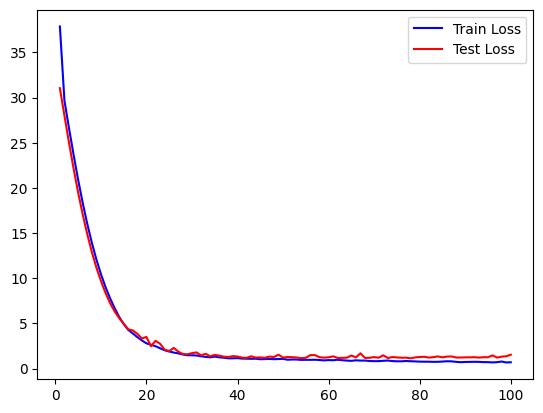

<Figure size 640x480 with 0 Axes>

In [20]:
#Visualisation
import matplotlib.pyplot as plt
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs , acc,'b', label = 'Train Accuracy')
plt.plot (epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs , loss,'b', label = 'Train Loss')
plt.plot (epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

In [21]:
L1 = 32
L2 = 128
L3 = 128
model6 = Sequential()
model6.add(Conv2D(L1, (5,5), activation='relu', input_shape=(150,150,3),padding = 'same',
                  kernel_initializer = 'he_normal', # He normal uses normal distribution
                  kernel_regularizer = regularizers.l1(0.1)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable))
model6.add(MaxPooling2D(pool_size=(3,3), strides=2))
model6.add(Dropout(rate=0.5))
model6.add(Conv2D(L1, (5,5), activation='relu', padding = 'same'))
model6.add(MaxPooling2D(pool_size=(3,3), strides=2))
model6.add(Dropout(rate=0.5))
model6.add(Flatten())
model6.add(Dense(L3, activation='relu'))
model6.add(Dropout(rate=0.5))
model6.add(Dense(6,activation='softmax'))

model6.compile(loss = 'categorical_crossentropy', optimizer = 'SGD',
              metrics=['accuracy'])

history6 = model6.fit(X_train, Y_train, epochs = 100, batch_size=128,
                    validation_data = (X_test, Y_test))

Epoch 1/100
22/22 [==============================] - 3s 118ms/step - loss: 32.5680 - accuracy: 0.1796 - val_loss: 28.9047 - val_accuracy: 0.2164
Epoch 2/100
22/22 [==============================] - 2s 91ms/step - loss: 26.7706 - accuracy: 0.2337 - val_loss: 24.3805 - val_accuracy: 0.2705
Epoch 3/100
22/22 [==============================] - 2s 110ms/step - loss: 22.4172 - accuracy: 0.3789 - val_loss: 20.4151 - val_accuracy: 0.3881
Epoch 4/100
22/22 [==============================] - 3s 127ms/step - loss: 18.6077 - accuracy: 0.4500 - val_loss: 16.8148 - val_accuracy: 0.4142
Epoch 5/100
22/22 [==============================] - 2s 100ms/step - loss: 15.3976 - accuracy: 0.4493 - val_loss: 13.7348 - val_accuracy: 0.4627
Epoch 6/100
22/22 [==============================] - 2s 93ms/step - loss: 12.4501 - accuracy: 0.4933 - val_loss: 11.0360 - val_accuracy: 0.4776
Epoch 7/100
22/22 [==============================] - 2s 92ms/step - loss: 10.0505 - accuracy: 0.4963 - val_loss: 9.0524 - val_accura

<Figure size 640x480 with 0 Axes>

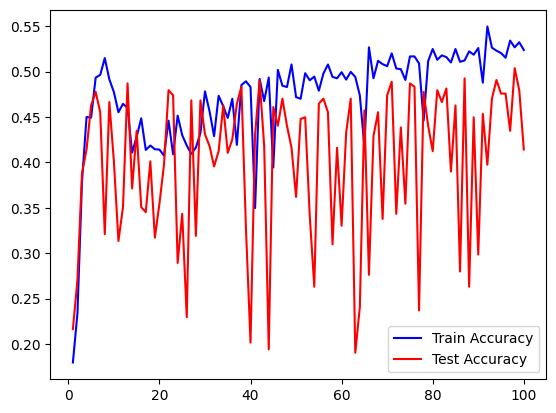

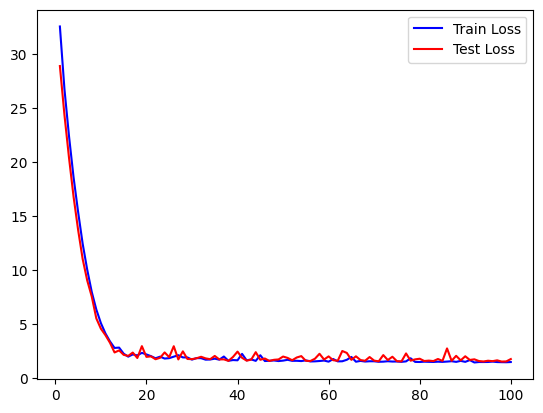

<Figure size 640x480 with 0 Axes>

In [22]:
#Visualisation
import matplotlib.pyplot as plt
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs , acc,'b', label = 'Train Accuracy')
plt.plot (epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs , loss,'b', label = 'Train Loss')
plt.plot (epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

# **SGD gets inconsistent results. Adam works better. Overfitting issue persist.**